<a href="https://colab.research.google.com/github/sonjoy2074/Time-series-forecasting-with-LSTM/blob/main/Time_Series_Forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/monthly_milk_production.csv",index_col='Date',parse_dates=True)
df = df.asfreq('MS')

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.isnull().sum()

,0
Production,0


<Axes: xlabel='Date'>

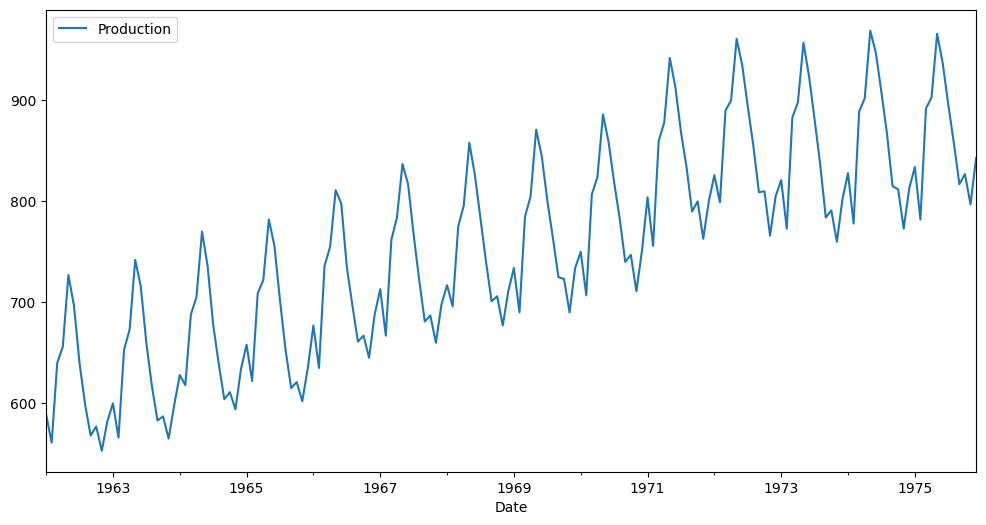

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

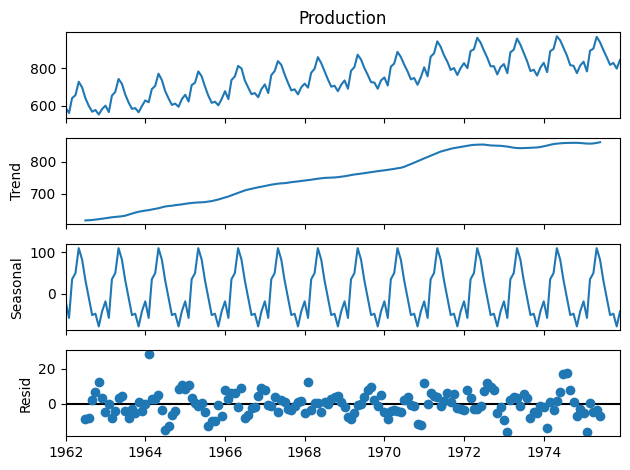

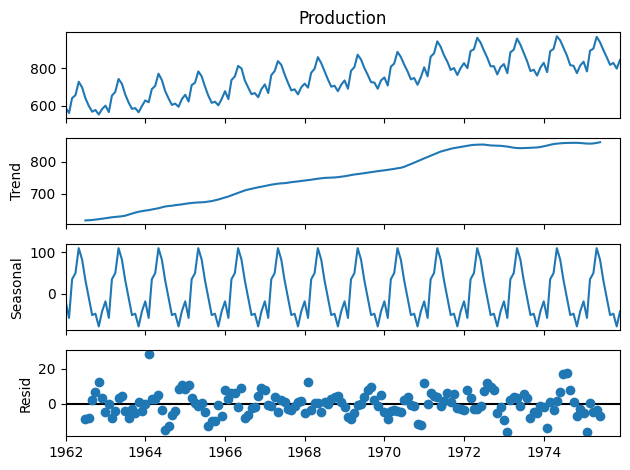

In [ ]:
results = seasonal_decompose(df['Production'])
results.plot()


In [ ]:
len(df)

168

In [ ]:
train=df.iloc[:156]
test=df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=n_input,
                              batch_size=1)

In [ ]:
print(len(scaled_train),len(generator))

156 153


In [ ]:
 X,y=generator[1]
 print(f'Given the array: \n{X.flatten()}')
 print(f'Predict this y: \n {y}')

In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=n_input,
                              batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [75]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,705 (479.32 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,804 (319.55 KB)

In [80]:
#fit model
history=model.fit(generator,epochs=50)

Epoch 1/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1122
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0227
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0244
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0042
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 

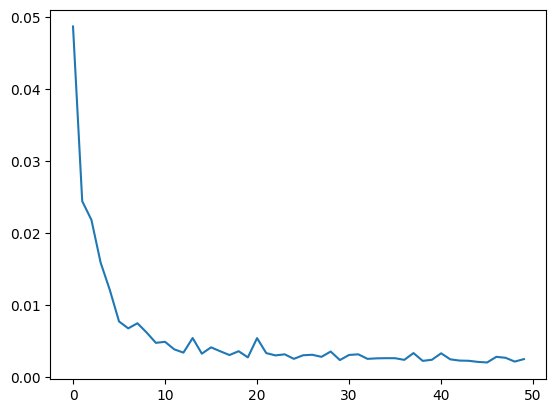

In [81]:
loss_per_epoch = history.history['loss']  # Access training loss
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [82]:
last_train_batch=scaled_train[-12:]

In [83]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [84]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


array([[0.66291434]], dtype=float32)

In [85]:
scaled_test[0]

array([0.67548077])

In [86]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [87]:
test_predictions

[array([0.66291434], dtype=float32),
 array([0.63274026], dtype=float32),
 array([0.8157986], dtype=float32),
 array([0.88645524], dtype=float32),
 array([1.0018011], dtype=float32),
 array([0.98026353], dtype=float32),
 array([0.9051652], dtype=float32),
 array([0.8067347], dtype=float32),
 array([0.69839054], dtype=float32),
 array([0.65885276], dtype=float32),
 array([0.60429955], dtype=float32),
 array([0.6538695], dtype=float32)]

In [88]:
test.head()

,Production
Date,
1975-01-01,821.355896
1975-02-01,812.190079
1975-03-01,889.898632
1975-04-01,919.365965
1975-05-01,971.358799


In [90]:
true_predictions = scaler.inverse_transform(test_predictions)

In [91]:
test['Predictions'] = true_predictions

<ipython-input-91-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

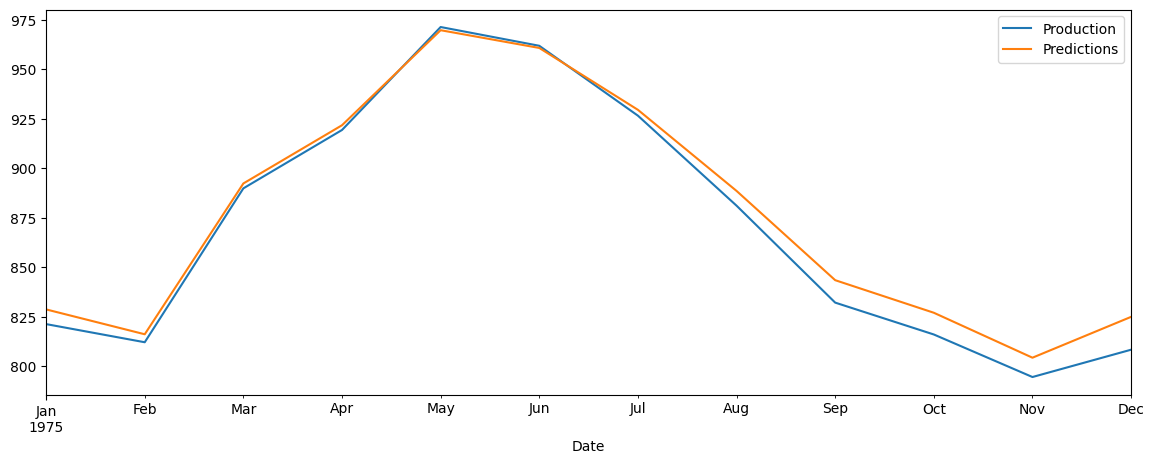

In [92]:
test.plot(figsize=(14,5))

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

8.010752981618534


In [96]:
model.save('/content/drive/MyDrive/Dataset/my_model.h5')